<a href="https://colab.research.google.com/github/jopachecoc/AD_1_preguntasmart/blob/main/AUnivariado_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#taller 2 analisis univariado
Problema: se desea conocer que es mejor, invertir en el SPY o en un CDT a 4 años?

Pregunta smart:
que es mas rentable En un plazo de 4 años, invertir 20 millones de pesos en el SPY o en un CDT si tenemos en cuenta que la taza del CDT es de 9% efectivo anual?

#Importancia de la columna:

Tomamos la informacion de un etf (SPY) de la siguiente URL:
https://finance.yahoo.com/quote/SPY/history/?period1=728317800&period2=1723227557
La columna a analizar es el comportamiento historico del ETF SPY (close) que esta basado en el SYP500 el cual es un conjunto de acciones de las mejores 500 empresas de EEUU. necesitamos saber el comportamiento de cierre de la accion diaria para poder deducir que es mejor a largo plazo invertir en este o colocar el dinero en un CDT a un plazo de 4 años.






In [3]:
from google.colab import drive # conect with my drive
drive.mount('/content/drive') # know all of files

Mounted at /content/drive


In [4]:
#!pwd
%cd /content/drive/MyDrive/icesi/semestre1/Auni

/content/drive/MyDrive/icesi/semestre1/Auni


In [5]:
#cargamos los datos.
import pandas as pd
import numpy as np
df =pd.read_csv("SPY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684105,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859661,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912321,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175692,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281015,531500


In [6]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


In [8]:
print(df['Close'].describe())

count    7939.000000
mean      177.147822
std       115.959374
min        43.406250
25%       106.325001
50%       133.149994
75%       216.360001
max       564.859985
Name: Close, dtype: float64


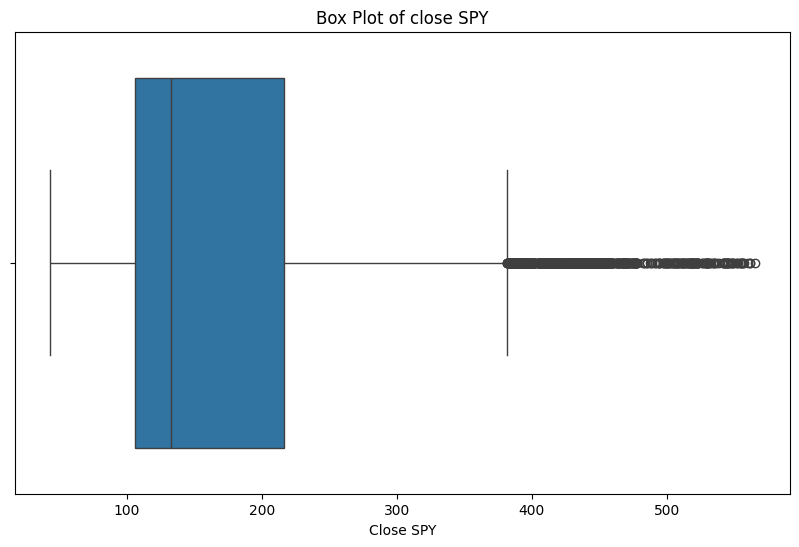

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Box Plot of close SPY')
plt.xlabel('Close SPY')
plt.show()

# esto me dice que tiene una tendencia exponencial ya que tiene atipicos hacia adelante osea de seguro crece mas rapido que un ajuste lineal
# para esto podemos calcular el ln y aplicarlo en la variable y comparar resultados sobre su comportamiento.


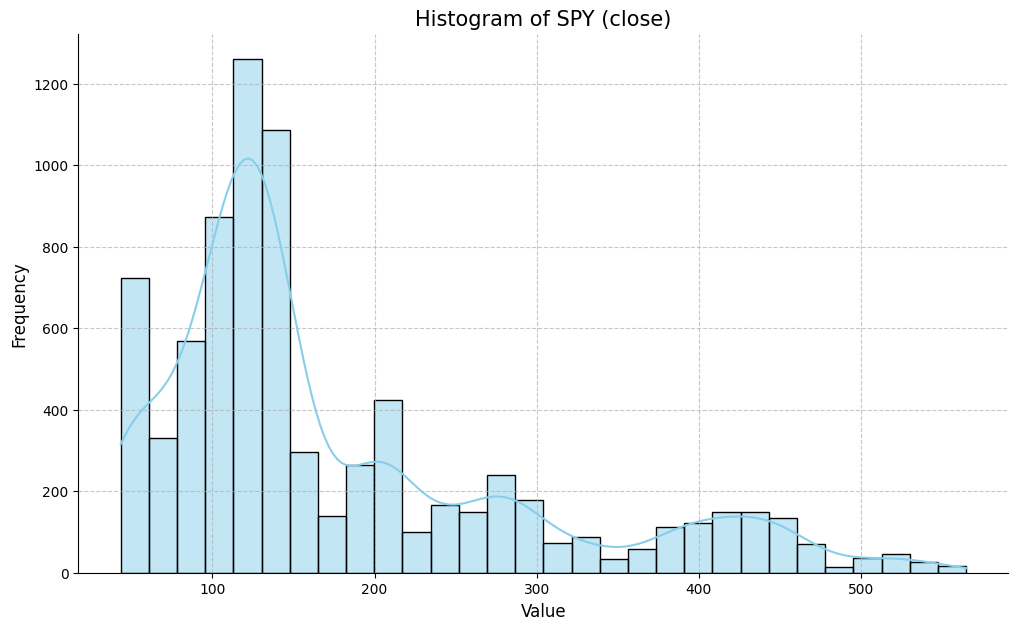

In [10]:
plt.figure(figsize=(12, 7))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of SPY (close)', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing the style
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Display the plot
plt.show()

#ser muy habil para poder tomar los valores altos de la serie

In [11]:
#vamos a sacar los años
#df.head()
df['Date'] = pd.to_datetime(df['Date'])
# Extraer el año
df['año'] = df['Date'].dt.year

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,año
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684105,1003200,1993
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859661,480500,1993
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912321,201300,1993
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175692,529400,1993
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281015,531500,1993


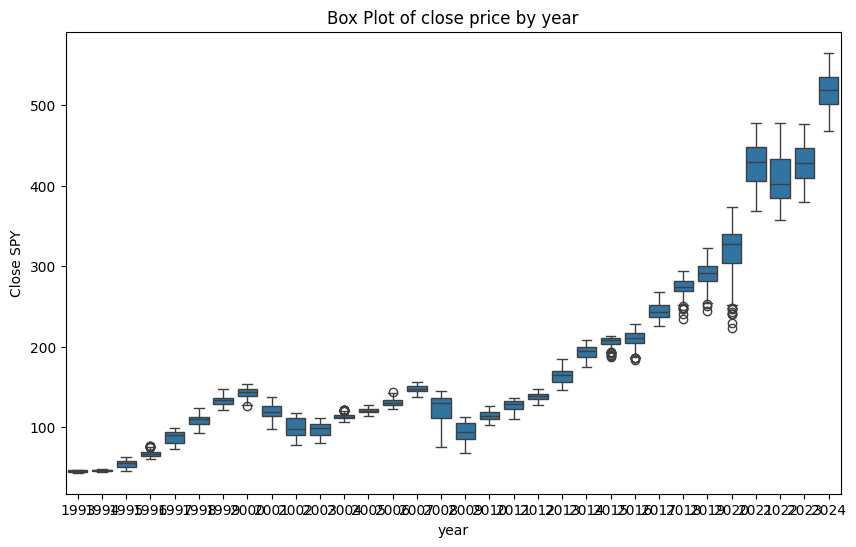

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='año', y='Close', data=df)

# Add titles and labels
plt.title('Box Plot of close price by year')
plt.xlabel('year')
plt.ylabel('Close SPY')

# Show the plot
plt.show()
# Acá encontramos algo interesante y es:
# la variabilidad del precio de cierre se me incrementa en los ultimos años por ende
# los pronosticos seguramente van a tener bandas de confianza amplias esto tambien nos indica que para hacer una inversion
# en SPY se convierte mas riesgosa o mas que riesgosa cuidadosa con escoger el precio de salida o vendida de las acciones


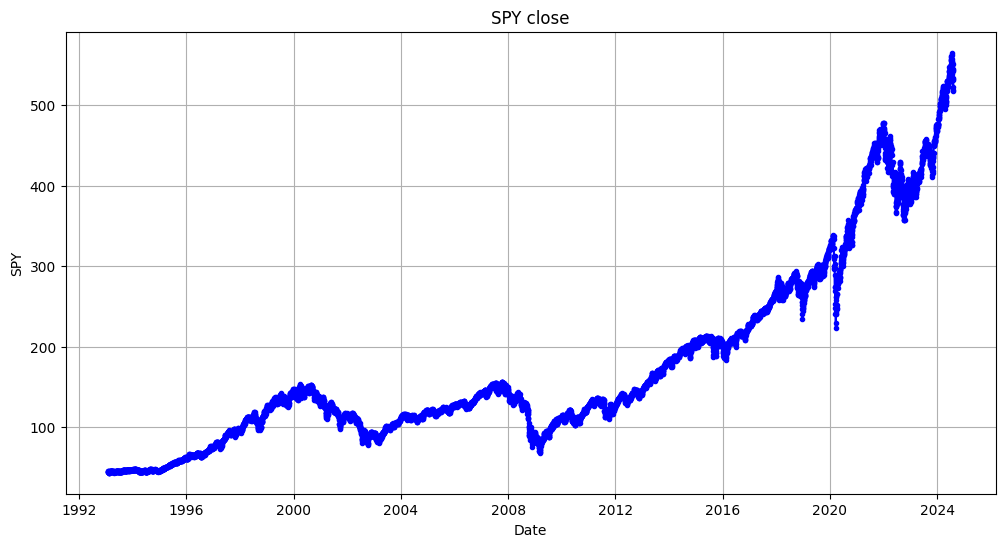

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Date, df['Close'], marker='.', linestyle='-', color='b')

# Add titles and labels
plt.title('SPY close')
plt.xlabel('Date')
plt.ylabel('SPY')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,año
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684105,1003200,1993
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859661,480500,1993
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912321,201300,1993
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175692,529400,1993
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281015,531500,1993



#todo pero en logaritmo

In [ ]:
df['Log_Natural'] = np.log(df['Close'])

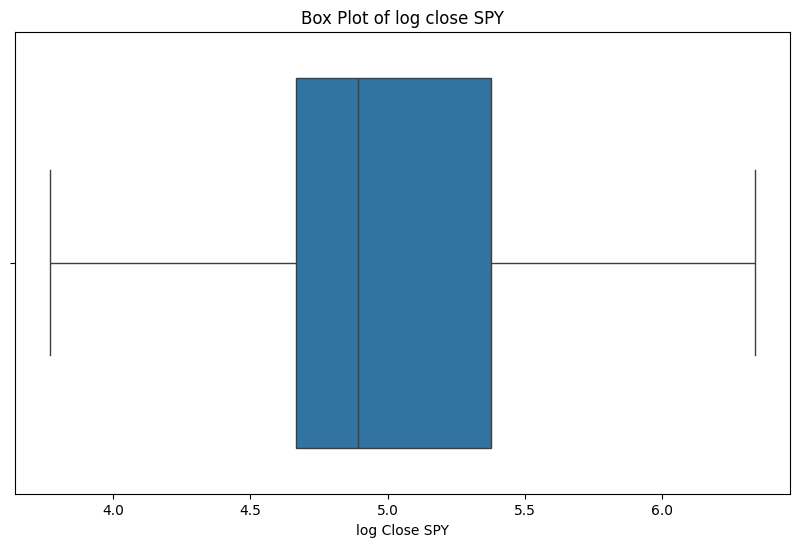

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Log_Natural'])
plt.title('Box Plot of log close SPY')
plt.xlabel('log Close SPY')
plt.show()

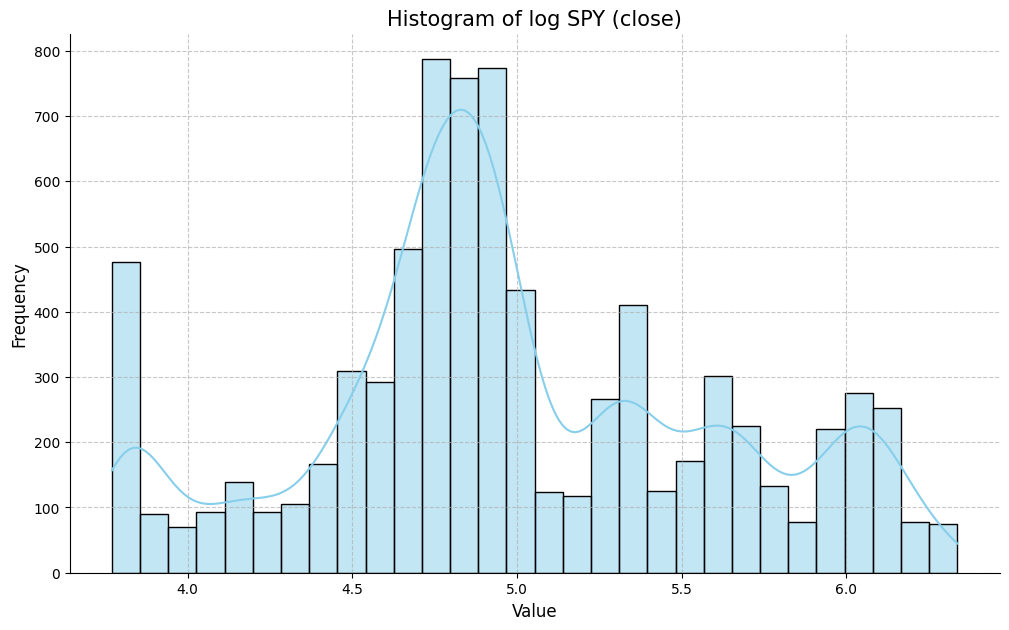

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df['Log_Natural'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of log SPY (close)', fontsize=15)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing the style
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Display the plot
plt.show()

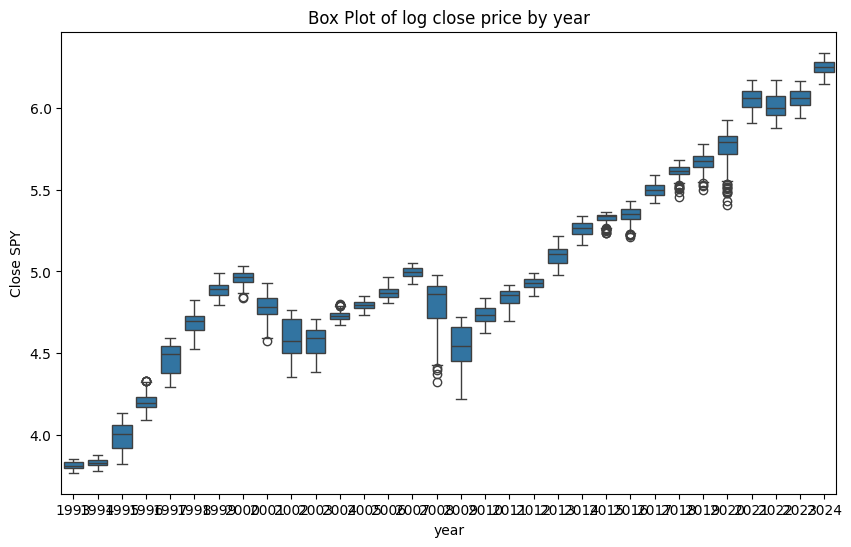

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='año', y='Log_Natural', data=df)

# Add titles and labels
plt.title('Box Plot of log close price by year')
plt.xlabel('year')
plt.ylabel('Close SPY')

# Show the plot
plt.show()

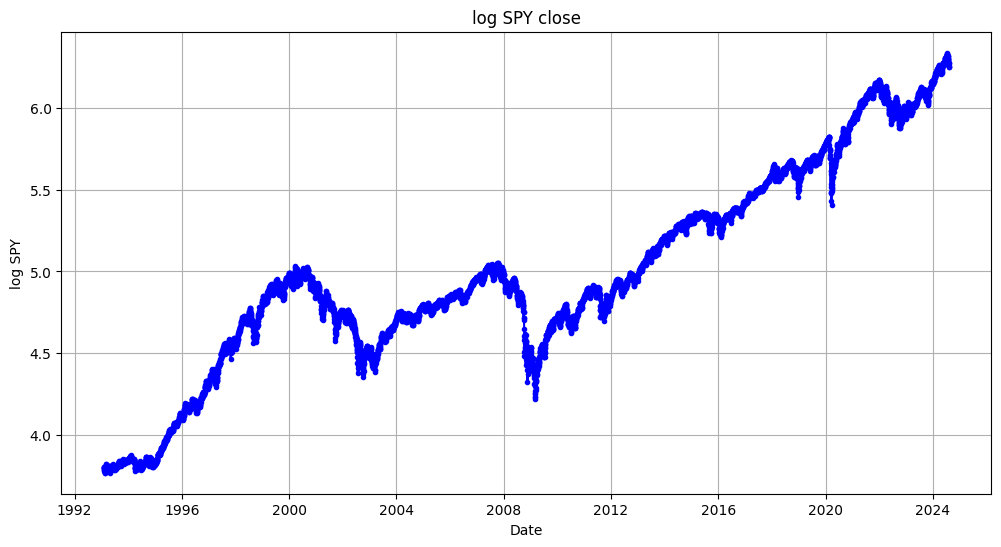

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Date, df['Log_Natural'], marker='.', linestyle='-', color='b')

# Add titles and labels
plt.title('log SPY close')
plt.xlabel('Date')
plt.ylabel('log SPY')
plt.grid(True)

# Show the plot
plt.show()

# descomposicion de la serie

# conclusiones de analisis univariado.

Segun lo visto anteriormente, vemos que existe la tendencia de la serie a travez de los años lo cual indica que de seguro tendremos una ganancia en la inversion a travez de los años.
tambien se evidencio que el crecimiento es exponencial, lo cual es bueno para reealizar una inversion ya que tiene una taza significativa de crecimiento.

si hacemos el ejercicio de un aumento del la inversion en los ultimos años 2020 al 2024 de cuando en el 2020 la acion esta a un precio de 340 lo cual equivale a que si ese dinero estuviera en u CDT a una tasa del 9% EA el valor de la accion 4 años despues estaria a 480 pesos, pero segun el precio que tomo la acion en el 2024 es de 5510 en promedio, lo cual esta por encima de lo esperado por el CDT.
Por otro lado evidenciamos mayor aribailidad en los ultimos años lo cual nos da una oportunidad de venta de la accio mas alta, en el cual podemos generar una alerta para cuando este en en tercer cuartil la aacion para tomar la desicion de venta en donde se ganaria un poco mas por ella.

Ojo:
Para un analisis seguido seria bueno descomponer la serie y quitarle la tendencia y analizar la variable sin tendencia para evidensiar algunos cambios y ver que sucede.


In [ ]:
import statsmodels.api as sm

In [ ]:
dates = pd.date_range(start='2024-06-04', periods=10, freq='W')
dates

DatetimeIndex(['2024-06-09', '2024-06-16', '2024-06-23', '2024-06-30',
               '2024-07-07', '2024-07-14', '2024-07-21', '2024-07-28',
               '2024-08-04', '2024-08-11'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive')


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
# Descomponer la serie temporal

# Extraer componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Graficar los componentes
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Close'], label='Original', color='black')
plt.title('Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None